![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador 2 - modelo de regresión**

### **Planteamiento de la problemática**
​
Hemos sido contratados en el equipo de ciencias de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de mercado de una importante automotriz china. Nuestro cliente desea ingresar a nuestro mercado de automóviles, por lo que nos han encomendado analizar las características de los vehículos presentes en el mercado actual. Dado que tienen en su catálogo una amplia colección de modelos de todo tipo, cuyo catálogo está estratificado en gamas según el gusto de cada región, desean saber qué características presentan los vehículos de gama alta y los de gama baja en nuestro mercado, para poder abarcar todo los públicos objetivos ajustándose a toda la demanda y, en base a estos datos, poder cotizar correctamente los vehículos que ofrecerá. 

Para ello, nuestro departamento de datos ha recopilado precios y características de varios de los modelos de vehículos disponibles en nuestro mercado, junto con sus precios de venta al público.


===========================================================

Éstas son las dos predicciones que se analizarán: ​ 

1 Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición. 

2 Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Carga y análisis

In [17]:
df = pd.read_csv(r"E:\Repositorios y bases de datos\Henry DS\Módulo 6\Proyecto_Integrador\Propuesta 2\ML_cars.csv")

In [18]:
df.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


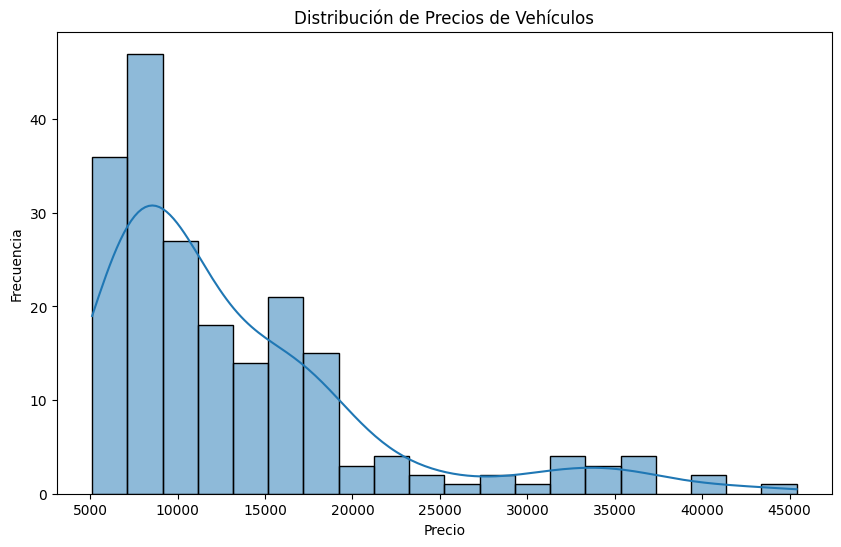

In [19]:
# Visualización de distribuciones y relaciones
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True)  
plt.title('Distribución de Precios de Vehículos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

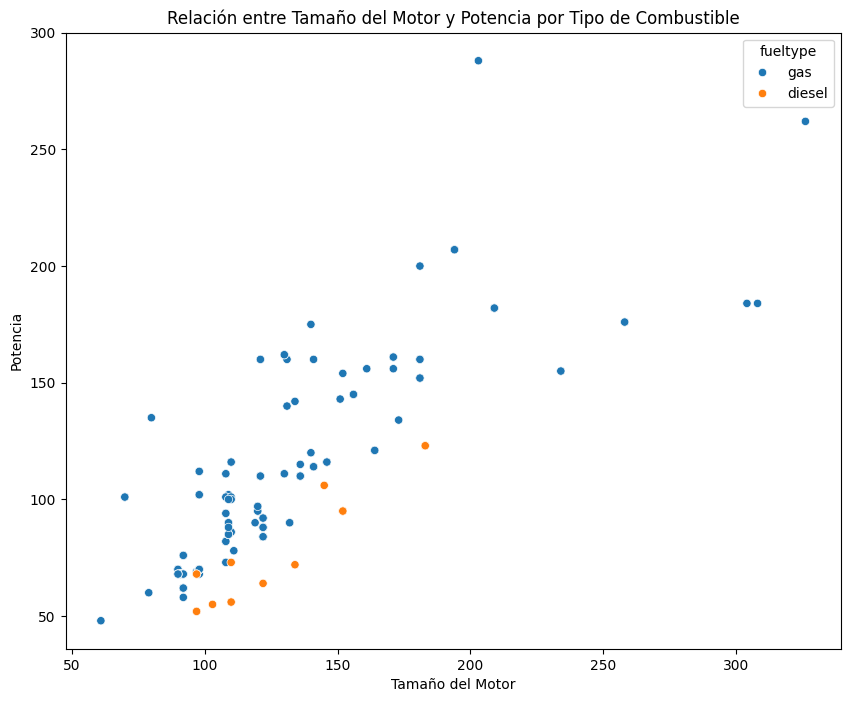

In [20]:
# Visualización de las relaciones entre variables
plt.figure(figsize=(10, 8))
sns.scatterplot(x='enginesize', y='horsepower', data=df, hue='fueltype')
plt.title('Relación entre Tamaño del Motor y Potencia por Tipo de Combustible')
plt.xlabel('Tamaño del Motor')
plt.ylabel('Potencia')
plt.show()

## Transformaciones

In [21]:
# Preprocesamiento de datos
columnas_dummies = ['enginetype', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas.remove('price')
columnas_numericas.remove('car_ID')  # Remover car_ID si está presente

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), columnas_dummies)
    ])

X = df.drop(['price', 'car_ID', 'CarName'], axis=1)
X_encoded = pd.get_dummies(X)  # Convertir variables categóricas en dummies
y = df['price']


In [22]:
# División en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [23]:
#Entrenamiento
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [24]:
# Predicción y evaluación
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [25]:
# ResuLtados
print("Evaluación del modelo RandomForestRegressor:")
print(f"MSE: {mse:.3f}")
print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.3f}")

Evaluación del modelo RandomForestRegressor:
MSE: 3323182.649
R^2: 0.958
MAE: 1278.086


In [26]:
print("$", np.round(y_pred[0], 2))

$ 35612.17
